Homework 7
====
#### CHE 116: Numerical Methods and Statistics
Prof. Andrew White

Version 1.0 (2/22/2016)

----

1. System of Equations (5 Points)
====

Solve this system of equations using the `linalg` package. Answer in Python.

$$\begin{array}{ll}
6 x + 4 y &= z^2\\
x - y &= 6 \\
2x - 2y &= z^2 - 4 \\
\end{array}$$

In [22]:
import numpy as np
from numpy import linalg

#note z^2 doesn't affect our answer
a_matrix = [[6, 4,-1],\
            [1, -1, 0],\
            [2, -2, -1]]
b_matrix = [0, 6, -4]

#convert them to numpy arrays/matrices
np_a_matrix = np.array(a_matrix)
np_b_matrix = np.array(b_matrix).transpose()

#Solve the problem
np_a_inv = linalg.inv(np_a_matrix)
np_x_matrix = np_a_inv.dot(np_b_matrix)

#print the solution, making sure to use z
print(np_x_matrix[0], np_x_matrix[1], np.sqrt(np_x_matrix[2]))

4.0 -2.0 4.0


2. Chemical Reaction (6 Points)
===

A set of frist-order chemical reactions can be described by the following system of differential equations:

$$\begin{array}{lr}
\cfrac{dC_1(t)}{dt} = & -2 C_1(t) + C_2(t) + C_3(t)\\
\cfrac{dC_2(t)}{dt} = & 2 C_1(t) - 4 C_2(t)\\
\cfrac{dC_3(t)}{dt} = & 3 C_2(t) - C_3(t)\\
\end{array}$$

Answer the following questions:

1. [1] Write down this system of ODEs using a matrix notation
2. [2] Mass is conserved in these equations. How can you tell from the matrix?
3. [1] Find the eigenvalues and eigenvectors for the coefficient matrix. It is *not* Hermitian. Use `linalg`.
4. [2] One of the eigenvalues is special. Make an argument, using math and python, for why this is significant with respect to equilibrium.

#### 2.1 Answer

$$\left[\begin{array}{lcr}
-2 & 1 & 1\\
2 & -4 & 0\\
0 & 3 & -1\\
\end{array}\right]
\left[\begin{array}{c}
C_1(t)\\
C_2(t)\\
C_3(t)\\
\end{array}\right] = 
\left[\begin{array}{c}
\cfrac{d\,C_1(t)}{dt}\\
\cfrac{d\,C_2(t)}{dt}\\
\cfrac{d\,C_3(t)}{dt}\\
\end{array}\right]$$

#### 2.2 Answer

The amount of $C_1$ leaving has to equal the amount of $C_1$ coming in. This is guaranteed by the columns summing to 0. 

#### 2.3 Answer

In [2]:
c_mat = np.array([[-2, 1,1], [2, -4, 0], [0, 3, -1]])
e_l, e_v = linalg.eig(c_mat)

In [3]:
for i in range(3):
    print(e_l[i], e_v[:, i])

-4.0 [  5.45747210e-16   7.07106781e-01  -7.07106781e-01]
-3.0 [-0.26726124 -0.53452248  0.80178373]
-3.84352614539e-16 [ 0.53452248  0.26726124  0.80178373]


#### 2.4 Answer

That eigenvector results in all derivatives being $0$, meaning the concentrations do not change

In [4]:
print(c_mat.dot(e_v[:,2]))

[  1.22124533e-15  -6.66133815e-16  -5.55111512e-16]


3. Python Practice (20 Points)
====

All your functions must have docstrings for full credit.

1. [4] Create a button and text input, where the value of the text box is printed out. Make it so that the output area is cleared each time the button is pressed.

2. [4] Create a button that prints a random integer from 0 to 10 using the `random.randint` function.

3. [4] Make a list of strings. Using your button from part 2, now have it print a random string from your list. 

4. [8] Take the following matrix: `[[3, 2, -6], [2, 6, 4], [3, 4, 0]]` and use an interaction widget to display its eigenvalues and eigenvectors. Your slider should go from 0 to 2 and each value should result in a latex display showing the eigenvalue and eigenvector. Note that Python eats `{}` in strings, so you'll have to use `{{}}`. This is called escaping. Python also eats many things that have a backslash. For example, `\b` means backspace to python. And `\\` means `\` in python.  So you'll have to write  `\\` when you want LaTeX to see `\` and in general use some trial in error about backslashes. You can never have too many though! For example, write `\\begin{{array}}` to start your matrix. Use three `''' for example'''` to have a string that spans multiple lines. [Summary comic](http://xkcd.com/1638/). Practice getting the LaTeX correct before putting it all together.

In [23]:
#3.1 Answer

from ipywidgets import widgets
from IPython import display 

button = widgets.Button(description="Print")
text = widgets.Text('')

def clear_and_print(b):
    display.clear_output()
    print(text.value)

button.on_click(clear_and_print)

display.display(text)
display.display(button)

3


In [25]:
#3.2 Answer

import random

def randint(b):
    display.clear_output()
    print(random.randint(0,10))

button = widgets.Button(description='random')
button.on_click(randint)
display.display(button)

In [24]:
#3.3 Answer

my_strings = ['(⊙ᗜ⊙)', '╚═╏ ⇀ ͜ر ↼ ╏═╝', 'ლ(́◉◞౪◟◉‵ლ)', 'ლ(ʘ̆〰ʘ̆)ლ']

def rand_string(b):
    display.clear_output()
    print(my_strings[random.randint(0,len(my_strings))])

button = widgets.Button(description='Raise your donger!')
button.on_click(rand_string)
display.display(button)

(⊙ᗜ⊙)


In [26]:
#3.4 Answer

mat = np.array([[3, 2, -6], [2, 6, 4], [3, 4, 0]])
e_l, e_v = linalg.eigh(mat)
def print_eig(i):
    display.display(display.Latex('''
    $$\\left[\\begin{{array}}{{c}}
    {0:0.5}\\\\
    {1:0.5}\\\\
    {2:0.5}\\
    \end{{array}}\\right]
    $$'''.format(e_v[i, 0], e_v[i, 1], e_v[i, 2])))
widgets.interact(print_eig, i=(0,2,1))

<IPython.core.display.Latex object>

<function __main__.print_eig>

4. Integration (12 Points)
====

Compute the following integrals using `scipy`. Report all your answers using `display.Latex` and only three decimal places.

1. $$\int_0^1 \sin^2(x)\, dx$$

2. $$\int_0^\infty x^{-2}\, dx$$

3. Integrate the normal distribution with $\sigma = 2$, $\mu = -4$ from $-2$ to $2$. Do not use `scipy.stats`

4. Repeat part 1 but use the trapezoidal rule instead of `scipy`


In [18]:
#4.1 Answer

from scipy.integrate import quad

def fxn(x):
    return np.sin(x)**2

ans, err = quad(fxn, 0, 1)

display.Latex('$$\int_0^1 \sin^2(x)\, dx = {0:.3}$$'.format(ans))

<IPython.core.display.Latex object>

In [20]:
#4.2 Answer

ans,_ = quad(lambda x: x**-2, 0, np.infty)

display.Latex('$$\int_0^\infty x^{{-2}}\, dx = {:.3}$$'.format(ans))

C:\Users\Andrew\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:352: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


<IPython.core.display.Latex object>

In [21]:
#4.3 Answer

def pdf(x, mu=-4, sig=2):
    return 1 / np.sqrt(sig**2 * 2 * np.pi) * np.exp(- (x - mu)**2 / (2 * sig**2))

ans,_ = quad(pdf, -2, 2)

display.Latex('$$\int_{{-2}}^{{-2}} \\frac{{1}}{{\\sigma\\sqrt{{2\\pi^2}}}} e^{{\cfrac{{(x - \\mu)^2}}{{2\\sigma^2}}}} = {:.3}$$'.format(ans))

<IPython.core.display.Latex object>

5. Numerical Integration/Differentiation (12 Points)
===

1. Compute and plot the numerical derivatives of the data given in the next cell. Use a for loop and the central difference rule
2. Repeat part 1 using numpy arrays.
2. Compute the integral of the numerical data using the trapezoidal rule. Use a for loop.
3. Repeat part 3 with numpy

In [87]:
data_5_x = [0.0, 0.2857,  0.5714,  0.8571,  1.1429,  1.4286,  1.7143,  2.0,  2.2857,  2.5714,  2.8571,  3.1429,  3.4286,  3.7143,  4.0,  4.2857,  4.5714,  4.8571,  5.1429,  5.4286,  5.7143,  6.0,  6.2857,  6.5714,  6.8571,  7.1429,  7.4286,  7.7143,  8.0,  8.2857,  8.5714,  8.8571,  9.1429,  9.4286,  9.7143,  10.0,  10.2857,  10.5714,  10.8571,  11.1429,  11.4286,  11.7143,  12.0,  12.2857,  12.5714,  12.8571,  13.1429,  13.4286,  13.7143,  14.0]
data_5_y = [67.9925, 67.5912,  67.4439,  66.7896,  66.4346,  66.3176,  65.7527,  65.1487,  65.7247,  65.1831,  64.5981,  64.5213,  63.6746,  63.9106,  62.6127,  63.3892,  62.6511,  62.601,  61.9718,  60.5553,  61.5862,  61.3173,  60.5913,  59.7061,  59.6535,  58.9301,  59.346,  59.2083,  60.3429,  58.752,  57.6269,  57.5139,  59.0293,  56.7979,  56.2996,  56.4188,  57.1257,  56.1569,  56.3077,  55.893,  55.4356,  56.7985,  55.6536,  55.8353,  54.4404,  54.2872,  53.9584,  53.3222,  53.2458,  53.7111]

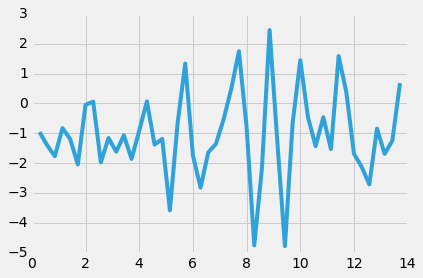

In [100]:
#5.1 Answer
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

deriv = []

for i in range(1, len(data_5_x) - 1):
    forward = (data_5_y[i + 1] - data_5_y[i]) / (data_5_x[i + 1] - data_5_x[i])
    backward = (data_5_y[i] - data_5_y[i - 1]) / (data_5_x[i] - data_5_x[i - 1])
    deriv.append((forward + backward) / 2)

plt.plot(data_5_x[1:-1], deriv)
plt.show()

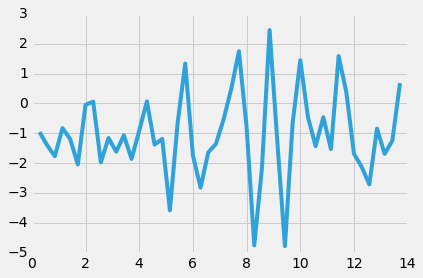

In [101]:
#5.2 Answer

x = np.array(data_5_x)
y = np.array(data_5_y)

forward = (y[1:] - y[:-1]) / (x[1:] - x[:-1])
backward = forward
dervi = (forward[:-1] + backward[1:]) / 2.

plt.plot(x[1:-1], deriv)
plt.show()

In [103]:
#5.3 Answer

area = 0
for i in range(len(data_5_x) - 1):
    width = data_5_x[i + 1] - data_5_x[i]
    area += 0.5 * width * (data_5_y[i + 1] + data_5_y[i])
print(area)

842.6582772749996


In [104]:
#5.4 Answer

area = 0.5 * np.sum( (x[1:] - x[:-1]) * (y[1:] + y[:-1]) )

print(area)

842.658277275
